In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st
import numpy as np

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [17]:
complete_df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='left')
complete_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [18]:
mouse_number = complete_df["Mouse ID"].unique()
print("Total Mouse: ",len(mouse_number))

Total Mouse:  249


In [19]:
index_complete_df = complete_df.set_index("Mouse ID")
index_complete_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [20]:
clean_complete_df = index_complete_df.drop(['g989'])
clean_complete_df.shape

(1880, 7)

In [21]:
clean_complete_df2 = clean_complete_df.reset_index()
clean_complete_df2['Mouse ID'].value_counts()


k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [22]:
clean_complete_df2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


##Summary Statistics

In [23]:
combined_data = clean_complete_df2

In [25]:
mean = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

stats_summary = pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":median,
    "Variance Tumor Volume":variance,
    "Std.Dev Tumor Volume":std,
    "Std.Err Tumor Volume":sem
})
stats_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std.Dev Tumor Volume,Std.Err Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

combined_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

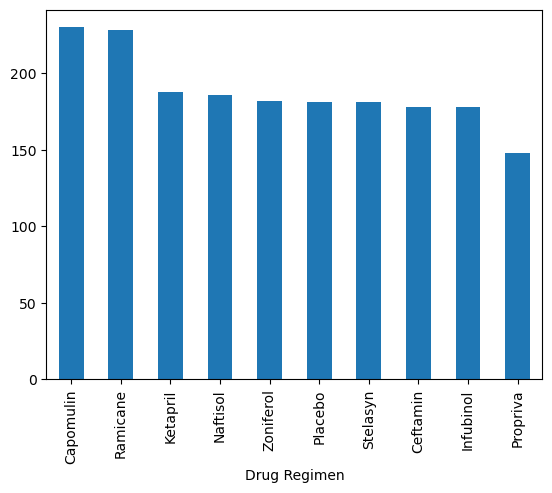

In [36]:
timepoint = combined_data.groupby(["Drug Regimen"])["Timepoint"].count()
timepoint.sort_values(ascending = False).plot.bar()
plt.show()

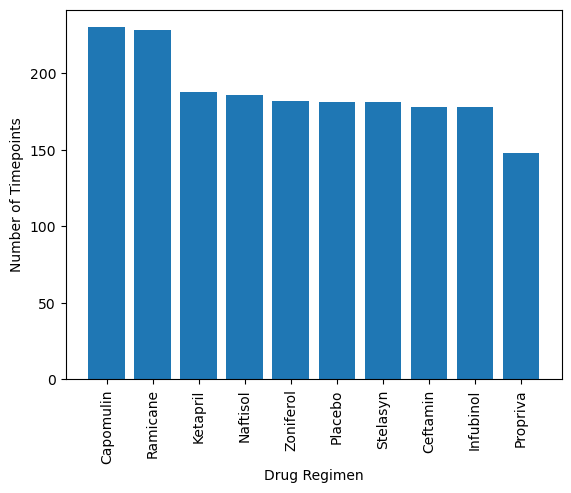

In [41]:
timepoint_desc = timepoint.sort_values(ascending=False)
plt.bar(timepoint_desc.index, timepoint_desc.values)
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:ylabel='Sex'>

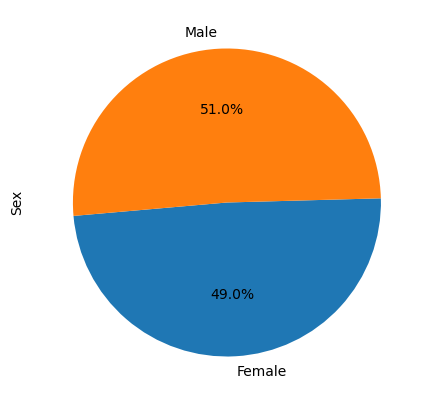

In [43]:
sex = combined_data.groupby(['Sex'])['Sex'].count()
sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5,5))

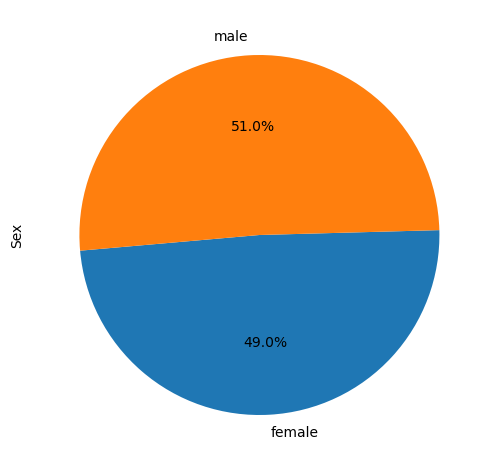

In [45]:
plt.pie(sex, labels = ('female','male'), startangle = 185, autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
last_tm = combined_data.groupby(['Mouse ID'])['Timepoint'].max()
last_tm_df = pd.DataFrame(last_tm)
last_df = pd.merge(combined_data, last_tm_df, on=('Mouse ID','Timepoint'), how ='right')
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [54]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

for index, row in last_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
        
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })

drug_df_max = drug_df.max()
drug_df_min = drug_df.min()

drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


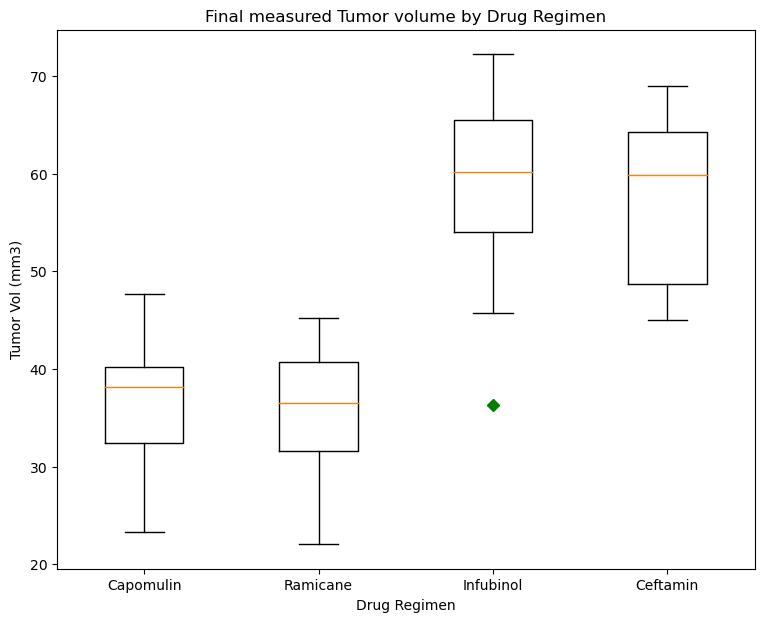

In [55]:
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen') 
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Vol (mm3)') 

ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments) 
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

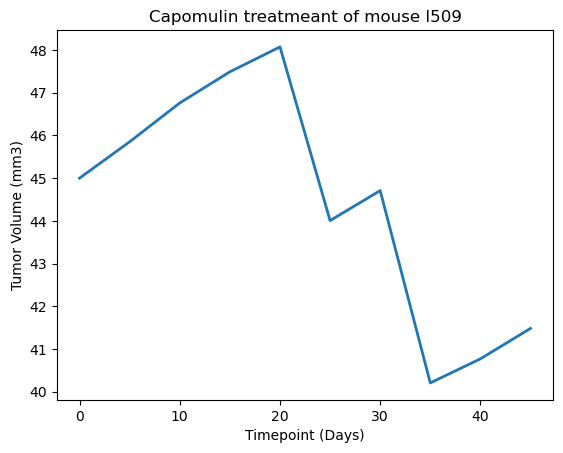

In [57]:
line_df = combined_data.loc[combined_data["Mouse ID"] == "l509",:]
line_df
x_axisTP = line_df["Timepoint"] 
tumsiz = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')

plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

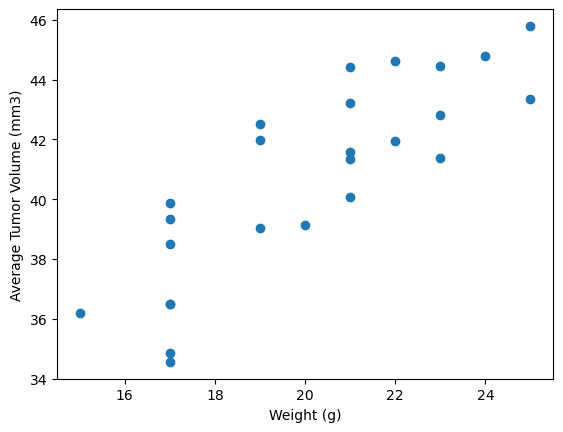

In [58]:
cap_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [59]:
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [60]:
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [61]:
slope = 0.9544396890241045
intercept = 21.552160532685015

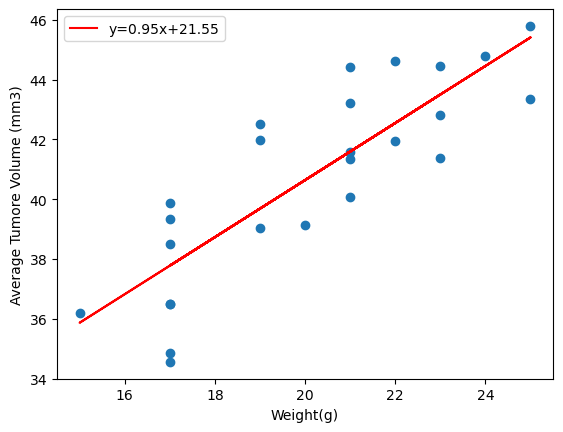

In [62]:
line = slope*(capavg['Weight (g)'])+intercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.legend()
plt.savefig('linearregression')
plt.show()